<a href="https://colab.research.google.com/github/DIPANJAN001/Forecasting-Solar-Energy/blob/master/pv_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [7]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [8]:
df=pd.read_excel("/content/pv_11.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [9]:
rfc = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(weather_input), np.array(solpow)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	11
Rejected: 	22
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	11
Rejected: 	22
Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	11
Rejected: 	22
Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	11
Rejected: 	22
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	11
Rejected: 	22
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	11
Rejected: 	22
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	11
Rejected: 	22
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	11
Rejected: 	22
Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=141,
                                         random_state=RandomState(MT19937) at 0x7F947BD6DB40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F947BD6DB40, verbose=2)

In [10]:
X_important_train = boruta_selector.transform(np.array(weather_input))
num_steps = 2
# training set
(x_transformed_train,
 y_transformed_train) = lstm_data_transform(X_important_train,solpow , num_steps=num_steps)
assert x_transformed_train.shape[0] == y_transformed_train.shape[0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed_train,y_transformed_train,test_size=0.33, random_state=42,shuffle=False)
#X_train_,X_val,y_train_,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42,shuffle=False)
inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))

In [11]:
inputs1

<KerasTensor: shape=(None, 2, 19) dtype=float32 (created by layer 'input_1')>

In [12]:
from keras import optimizers

In [13]:
opt=optimizers.Adam(learning_rate=0.001)

Epoch 1/100
52/52 [==============================] - 17s 78ms/step - loss: 0.0613 - mse: 0.0613 - val_loss: 0.0407 - val_mse: 0.0407
Epoch 2/100
52/52 [==============================] - 2s 44ms/step - loss: 0.0388 - mse: 0.0388 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 3/100
52/52 [==============================] - 2s 45ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 4/100
52/52 [==============================] - 2s 44ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 5/100
52/52 [==============================] - 2s 42ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 6/100
52/52 [==============================] - 2s 38ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 7/100
52/52 [==============================] - 2s 39ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 8/100
52/52 [==============================] - 2s 40ms/step - loss: 0

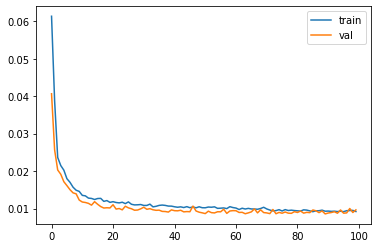

64/64 [==============================] - 2s 7ms/step


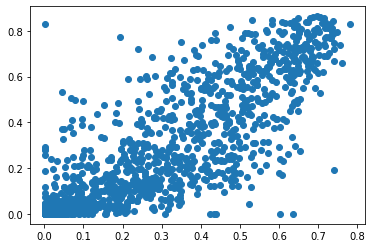

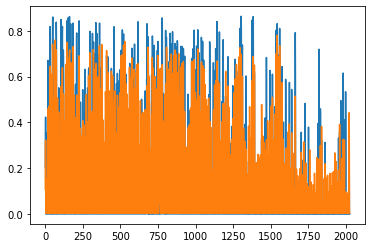

0.11481819407409902


In [14]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

Epoch 1/200
52/52 [==============================] - 46s 151ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 2/200
52/52 [==============================] - 2s 46ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 3/200
52/52 [==============================] - 2s 41ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 4/200
52/52 [==============================] - 2s 43ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 5/200
52/52 [==============================] - 2s 45ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 6/200
52/52 [==============================] - 2s 43ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 7/200
52/52 [==============================] - 4s 74ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 8/200
52/52 [==============================] - 2s 43ms/step - loss: 

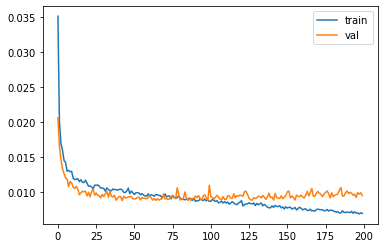

64/64 [==============================] - 3s 7ms/step


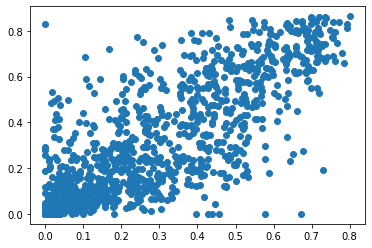

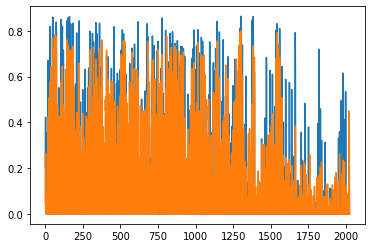

0.1177185952637047


In [19]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.5)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.5)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64 )
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

In [20]:
from keras.layers import Bidirectional

Epoch 1/75
52/52 [==============================] - 34s 159ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2/75
52/52 [==============================] - 5s 95ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 3/75
52/52 [==============================] - 5s 97ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 4/75
52/52 [==============================] - 5s 95ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 5/75
52/52 [==============================] - 5s 98ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 6/75
52/52 [==============================] - 5s 93ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 7/75
52/52 [==============================] - 5s 92ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 8/75
52/52 [==============================] - 5s 98ms/step - loss: 0.0114 -

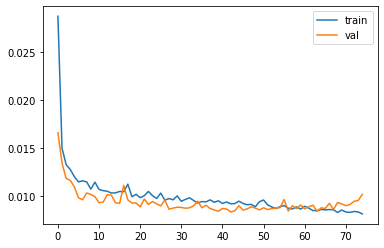

64/64 [==============================] - 4s 18ms/step


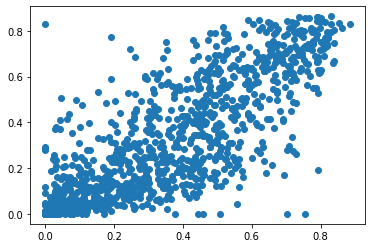

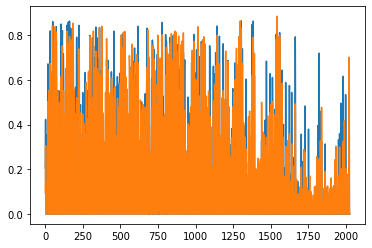

0.11812858651148182


In [28]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 75,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

Epoch 1/75
52/52 [==============================] - 35s 199ms/step - loss: 0.0316 - mse: 0.0316 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 2/75
52/52 [==============================] - 5s 98ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 3/75
52/52 [==============================] - 5s 96ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 4/75
52/52 [==============================] - 5s 95ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 5/75
52/52 [==============================] - 5s 97ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 6/75
52/52 [==============================] - 5s 100ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 7/75
52/52 [==============================] - 5s 96ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 8/75
52/52 [==============================] - 5s 98ms/step - loss: 0.0119 

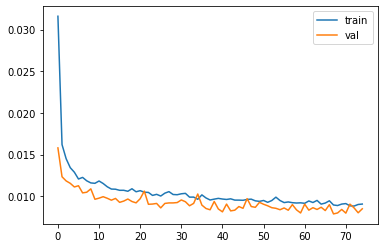

64/64 [==============================] - 5s 18ms/step


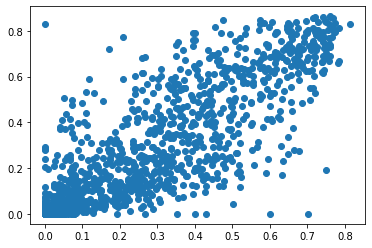

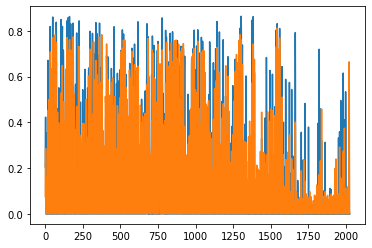

0.1135207794628327


In [29]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 75,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))